In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error, accuracy_score

# Read the dataset
df_cars = pd.read_csv('./final_dataset.csv', sep=',', decimal='.')

# How many colums are nan?
num_cols = df_cars.isnull().sum()
print(num_cols)

# Drop the columns with nan values
df_cars = df_cars.dropna(axis=0)


uuid                                0
Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64


In [9]:
# -----------------------------
# scale the dataset
# -----------------------------
#
# When your data has different values, and even different measurement units, it can be difficult to compare them. What is kilograms compared to meters? Or altitude compared to time?
# The answer to this problem is scaling. We can scale data into new values that are easier to compare.

data = df_cars[['Fuel Consumption City (L/100 km)', 'CO2 Emissions(g/km)']]
fuel_consumption = 'Fuel Consumption City (L/100 km)'
co2_emissions = 'CO2 Emissions(g/km)'

# Standard deviation
# StandardScaler follows Standard Normal Distribution (SND). Therefore, it makes mean = 0 and scales the data to unit variance.
standard_scale = StandardScaler()

x_standard_scale = standard_scale.fit_transform(data)
x_standard_scale = pd.DataFrame(x_standard_scale, columns = [fuel_consumption, co2_emissions])

print(x_standard_scale)

# Min Max Scaler
# MinMaxScaler scales all the data features in the range [0, 1] or else in the range [-1, 1] if there are negative values in the dataset
min_max_scale = MinMaxScaler()

x_min_max_scale = min_max_scale.fit_transform(data)
x_min_max_scale = pd.DataFrame(x_min_max_scale, columns = [fuel_consumption, co2_emissions])

print(x_min_max_scale)

# Robust Scaler
# RobustScaler scales the data to median and quantiles. Therefore, the outliers are not affected by the scaling.
robust_scale = RobustScaler()

x_robust_scale = robust_scale.fit_transform(data)
x_robust_scale = pd.DataFrame(x_robust_scale, columns = [fuel_consumption, co2_emissions])

print(x_robust_scale)

# -----------------------------
# plot the dataset to show the scaling
# -----------------------------

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize = (20, 5))
ax1.set_title('Before Scaling')
sns.kdeplot(df_cars[fuel_consumption], ax = ax1, color ='r')
sns.kdeplot(df_cars[co2_emissions], ax = ax1, color ='b')

ax2.set_title('After Robust Scaling')  
sns.kdeplot(x_robust_scale[fuel_consumption], ax = ax2, color ='red')
sns.kdeplot(x_robust_scale[co2_emissions], ax = ax2, color ='blue')
ax3.set_title('After Standard Scaling')
  
sns.kdeplot(x_standard_scale[fuel_consumption], ax = ax3, color ='black')
sns.kdeplot(x_standard_scale[co2_emissions], ax = ax3, color ='g')
ax4.set_title('After Min-Max Scaling')
  
sns.kdeplot(x_min_max_scale[fuel_consumption], ax = ax4, color ='black')
sns.kdeplot(x_min_max_scale[co2_emissions], ax = ax4, color ='g')
plt.show()


# --------------------------
# Describing the plotted data
# --------------------------

# The plot shows a comparison of all three scaling methods. The axis show the density and the fuel consumption city. 
# The first plot shows the data before scaling. The second plot shows the data after Robust Scaling.
# The third plot shows the data after Standard Scaling. The fourth plot shows the data after Min-Max Scaling.
# All three plots show that the data is aligning better after they are scaled. Espacially the robot scaling shows that the data look now more similar.

NameError: name 'df_cars' is not defined

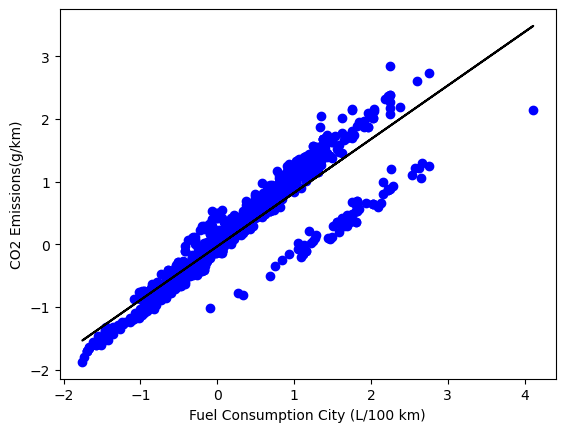

MAE: 0.17362526444631776
MSE: 0.0713437047177382
RMSE: 0.26710242364632


In [10]:
import pickle

# -----------------------------
# Hyperparameters
# -----------------------------

# Hyperparameters in Machine learning are those parameters that are explicitly defined by the user to control the learning process.
# example: learning rate


# -----------------------------
# Linear regression
# -----------------------------

# Can the input data be changed to a scaled dataset for better performance?

X = np.array(x_robust_scale[fuel_consumption]).reshape(-1, 1)
y = np.array(x_robust_scale[co2_emissions]).reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

regr = LinearRegression()
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)

pickle.dump(regr, open('regr-model.pkl', 'wb'))

fig, ax = plt.subplots()
ax.scatter(X_test, y_test, color ='b')
ax.plot(X_test, y_pred, color ='k')
ax.set_xlabel(fuel_consumption)
ax.set_ylabel(co2_emissions)
plt.show()

# Metrics
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) #default=True
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)
  
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

# -----------------------------
# Describing the Linear Regression Plot
# -----------------------------

# The plot shows the linear regression of the scaled dataset. The blue dots are the test data and the black line is the predicted data.
# The plots shows two long linear cluster and most of the errors come from the bottom data. Therefore a subset of the data would perform even better. 





In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn import utils

# -----------------------------
# Random forest
# -----------------------------

# Random forest is a supervised learning algorithm. It can be used both for classification and regression problems. However, it is mostly used for classification problems.

X_train, X_test, y_train, y_test = train_test_split( df_cars[['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)']], df_cars[co2_emissions], test_size = 0.30)

clf = RandomForestClassifier(n_estimators=100)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("ACCURACY OF THE MODEL: ", accuracy_score(y_test, y_pred))

# explore what features the model ‘thinks’ are most important in determining the co2 emission
pd.DataFrame(clf.feature_importances_, index=X_train.columns).sort_values(by=0, ascending=False)

ACCURACY OF THE MODEL:  0.5333935018050542


,0
Fuel Consumption Hwy (L/100 km),0.254474
Fuel Consumption City (L/100 km),0.238363
Fuel Consumption Comb (L/100 km),0.211220
Engine Size(L),0.189643
Fuel Consumption Comb (mpg),0.068460
Cylinders,0.037841


In [12]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = np.linspace(100, 3000, int((3000-100)/200) + 1, dtype=int)
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [1, 5, 10, 20, 50, 75, 100, 150, 200]
# Minimum number of samples required to split a node
# min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 10, num = 9)]
min_samples_split = [1, 2, 5, 10, 15, 20, 30]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Criterion
criterion=['gini', 'entropy']
random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'criterion': criterion}


rf_base = RandomForestClassifier()

# Tuning hyperparameters could be done by hand or could be handled by a function which is called RandomizedSearchCV
# RandomizedSearchCV is a function that will try all the possible combinations of the hyperparameters and return the best combination of hyperparameters.
# n_iter is the number of combinations that will be tried.
# cv is the number of folds that will be used for cross validation.
# n_jobs is the number of cores that will be used for parallel processing. -1 means all cores will be used.

rf_random = RandomizedSearchCV(estimator = rf_base, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=1, random_state=42, n_jobs = -1)

rf_random.fit(X_train, y_train)

y_pred = rf_random.predict(X_test)

print("ACCURACY OF THE MODEL: ", accuracy_score(y_test, y_pred))

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/Users/richardmenning/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/Users/richardmenning/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [ ]:
# ---------------------------
# 10K cross-validation
# ---------------------------

# Cross-validation is a technique for evaluating machine learning models by training several models on subsets of the available input data and evaluating them on the complementary subset of the data.

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from numpy import mean
from numpy import std

cv = KFold(n_splits=10, random_state=1, shuffle=True)

scores = cross_val_score(regr, X_train, y_train, cv=cv)

print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

# Results
# model has an estimated classification accuracy of 90% for linear regression
# model has an estimated classification accuracy of 45% for random forest
# Therefore it would be a better idea to choose linear regression

Accuracy: 0.847 (0.012)


>1 mean=0.8449 se=0.015
>2 mean=0.8445 se=0.018
>3 mean=0.8446 se=0.018
>4 mean=0.8445 se=0.019
>5 mean=0.8445 se=0.018
>6 mean=0.8445 se=0.018
>7 mean=0.8445 se=0.018
>8 mean=0.8445 se=0.019
>9 mean=0.8444 se=0.020
>10 mean=0.8444 se=0.020
>11 mean=0.8444 se=0.020
>12 mean=0.8444 se=0.019
>13 mean=0.8444 se=0.019
>14 mean=0.8445 se=0.019
>15 mean=0.8445 se=0.019


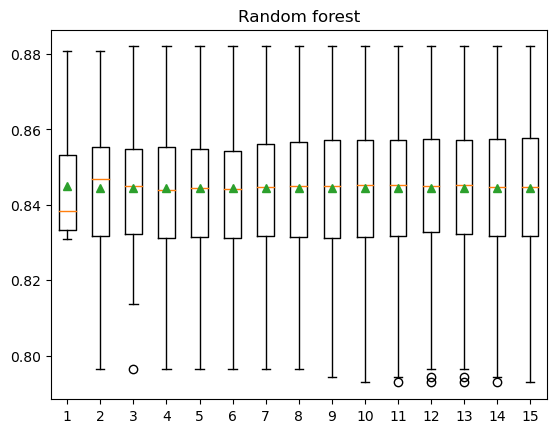

In [ ]:
from sklearn.model_selection import RepeatedKFold
# ---------------------------
# Boxplot for 10K cross-validation
# ---------------------------

def evaluate_model(X, y, repeats): 
    cv = RepeatedKFold(n_splits=10, n_repeats=repeats, random_state=1)
    scores = cross_val_score(regr, X, y, cv=cv, n_jobs=-1)
    return scores

repeats = range(1, 16)
results = list()

for r in repeats: 
    scores = evaluate_model(X_train, y_train, r)
    results.append(scores)
    print('>%d mean=%.4f se=%.3f' % (r, mean(scores), std(scores)))

plt.boxplot(results, labels=[str(r) for r in repeats], showmeans=True)
plt.title('linear regession')
plt.show()

# ---------------------------
# Describing Boxplot for 10K cross-validation
# ---------------------------

# The boxplot shows the accuracy of the model for different number of repeats. The mean accuracy is 90% and the standard deviation is 0.003. The boxplot shows that the accuracy is stable for 10 repeats and above. Therefore, 10 repeats is a good number for the cross-validation.
# The x-axis shows the repeats and the y-axis the accuracy. 
# Espacially after the 8 repeat the data shows no more big changes. 